In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
# print(data.feature_names)
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
data.data[1]

"From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 11\nNNTP-Posting-Host: carson.u.washington.edu\n\nA fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks.\n\nGuy Kuo <guykuo@u.washington.edu>\n"

In [9]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
# Creating traini set and test set
Categories = data.target_names

train = fetch_20newsgroups(subset='train', categories=Categories)
test = fetch_20newsgroups(subset='test', categories=Categories)

In [11]:
print(len(train.data))
print(len(test.data))

11314
7532


In [12]:
train.data[5]

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

In [13]:
# Applying naive bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [8]:
label = model.predict(test.data)

In [9]:
# creating confusion metrix and heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, label)
mat.T

array([[166,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          2,   0,   2,   0,   0,   2,  33],
       [  0, 252,  14,   5,   3,  21,   1,   1,   0,   0,   0,   2,   4,
          3,   2,   0,   0,   1,   0,   2],
       [  0,  15, 258,  11,   8,  17,   3,   0,   0,   0,   0,   1,   2,
          0,   0,   0,   0,   0,   0,   0],
       [  1,  12,  45, 305,  23,  13,  31,   3,   1,   0,   0,   0,  17,
          1,   1,   0,   1,   0,   0,   0],
       [  0,   9,   3,  17, 298,   2,  12,   0,   0,   1,   0,   0,   5,
          1,   0,   0,   0,   0,   0,   0],
       [  1,  18,   9,   1,   0, 298,   1,   0,   0,   0,   0,   1,   0,
          3,   3,   0,   0,   0,   0,   0],
       [  0,   1,   0,   3,   3,   1, 271,   4,   2,   0,   0,   1,   2,
          1,   0,   0,   2,   0,   0,   0],
       [  0,   2,   2,   6,   8,   0,  19, 364,  10,   4,   1,   3,   8,
          0,   2,   0,   0,   0,   1,   0],
       [  1,   1,   1,   1,   1,   1,   4,   3, 371,   0,   0,  

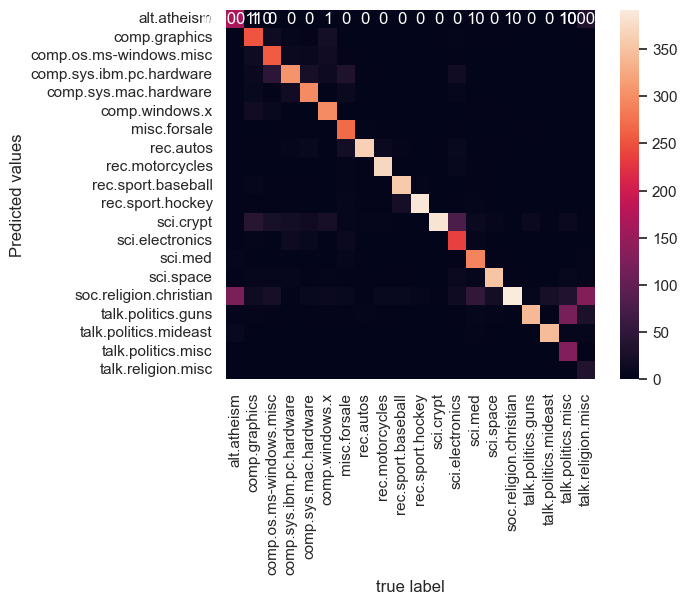

In [10]:
sns.heatmap(mat.T, square=True, annot=True,fmt='b', cbar=True,xticklabels=train.target_names,yticklabels=train.target_names )
plt.xlabel('true label')
plt.ylabel('Predicted values')
plt.show()

In [11]:
def predict_categoty(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [16]:
predict_categoty('Job Market is tense')

'rec.autos'

In [17]:
predict_categoty('Tesla is the best')

'sci.electronics'

In [18]:
predict_categoty('President')

'talk.politics.misc'